In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def simulate_normal_distribution(n, mean, std):
    # Generate normal distribution
    data = np.random.normal(mean, std, n)
    # Cap the values beyond 2 standard deviations from the mean
    data = np.clip(data, mean - 1*std, mean + 1*std)
    return data

def simulate_slightly_right_skewed_distribution(n, mean, std, skew_strength=0.04):
    # Start with normal distribution as base
    base_data = np.random.normal(mean, std, n)
    # Add skew: Apply an exponential transformation to introduce right skew
    skewed_data = base_data * np.exp(base_data * skew_strength)
    # Cap the values beyond 2 standard deviations from the mean
    skewed_data = np.clip(skewed_data, mean - 1*std, mean + 1.5*std)
    return skewed_data

def simulate_data(parameters):
    data = {}
    for key in parameters:
        if key in ['cnn_accuracy', 'rf_accuracy', 'rf_confidence']:
            data[key] = simulate_normal_distribution(*parameters[key])
        elif key in ['cnn_confidence']:
            data[key] = simulate_slightly_right_skewed_distribution(*parameters[key])
        else:
            # store the value directly
            data[key] = parameters[key]
    return data

In [3]:
from matplotlib.lines import Line2D

def plot_boxplot(ax, data, show_legend=True, title=None, xlabel=None, ylabel=None):
    """
    Create a boxplot for CNN and RF metrics with optional legend, title, and axis labels.

    Parameters:
    - data: Dictionary containing the data for CNN and RF metrics.
    - show_legend: Boolean to show or hide the legend. Default is True.
    - title: Title of the plot. Default is None.
    - xlabel: Label for the x-axis. Default is None.
    - ylabel: Label for the y-axis. Default is None.
    """

    # Plot boxplot with thinner bars
    boxplot = ax.boxplot([data['cnn_accuracy'], data['cnn_confidence'], data['rf_accuracy'], data['rf_confidence']], 
                         labels=['CNN Accuracy', 'CNN Confidence', 'RF Accuracy', 'RF Confidence'],
                         patch_artist=True,
                         medianprops=dict(color="black"),
                         widths=0.5)  # Adjust the width of the bars to make them thinner

    # Color bars for CNN (light blue) and RF (light coral)
    colors = ['lightblue', 'lightblue', 'lightcoral', 'lightcoral']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    # Dashed lines for majority values - only above CNN and RF Accuracy bars
    ax.axhline(y=data['cnn_majority'], color='blue', linestyle='--', label='CNN Majority Vote', xmin=0.00, xmax=0.25)
    ax.axhline(y=data['rf_majority'], color='red', linestyle='--', label='RF Majority Vote', xmin=0.50, xmax=0.75)
    ax.set_ylim(0.4, 1)  # Set y-axis limits to 0 and 1

    # Optional title and axis labels
    if title is not None:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    # Custom legend for colors
    if show_legend:
        custom_legend = [
            Line2D([0], [0], color='lightblue', lw=4, label='CNN Ensemble'),
            Line2D([0], [0], color='lightcoral', lw=4, label='Random Forest'),
            Line2D([0], [0], color='blue', linestyle='--', lw=2, label='CNN Ensemble Majority Vote'),
            Line2D([0], [0], color='red', linestyle='--', lw=2, label='Random Forest Majority Vote')
        ]
        ax.legend(handles=custom_legend, loc='upper left')

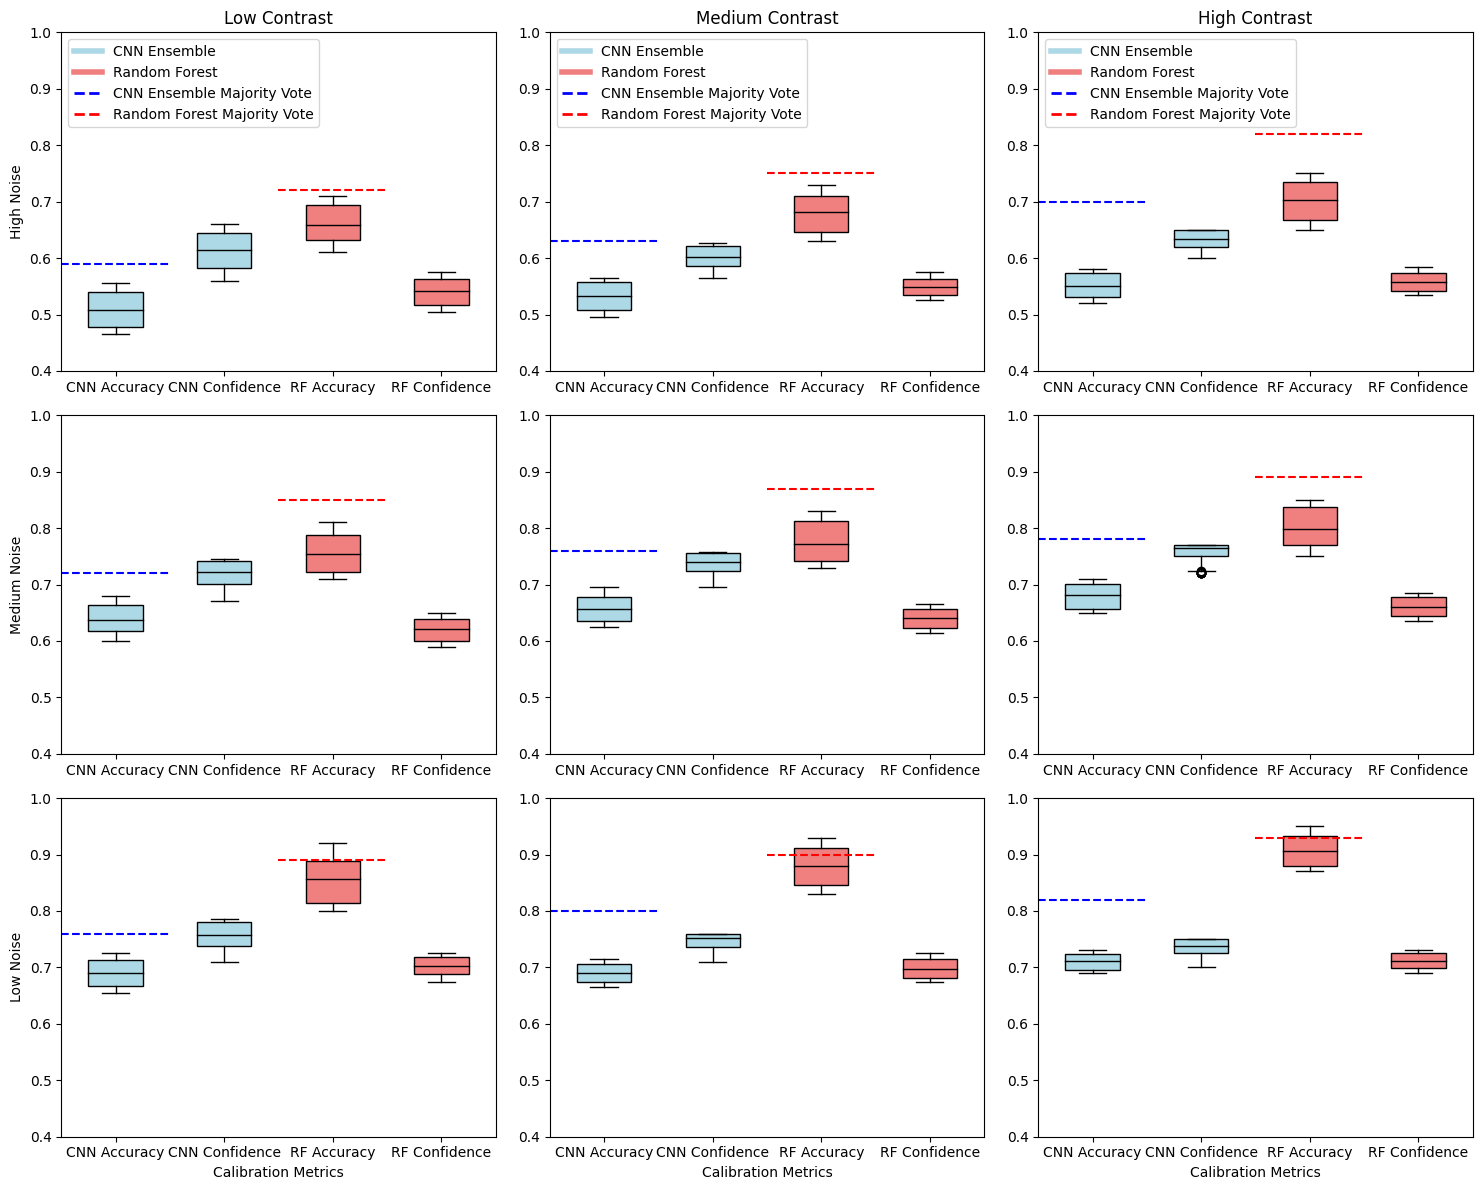

In [7]:
data_31_params = {
    'cnn_accuracy': (300, 0.69, 0.035),
    'cnn_confidence': (300, 0.74, 0.03),
    'rf_accuracy': (300, 0.86, 0.06),
    'rf_confidence': (300, 0.70, 0.025),
    'cnn_majority': (0.76),
    'rf_majority': (0.89)
}

data_32_params = {
    'cnn_accuracy': (300, 0.69, 0.025),
    'cnn_confidence': (300, 0.73, 0.02),
    'rf_accuracy': (300, 0.88, 0.05),
    'rf_confidence': (300, 0.70, 0.025),
    'cnn_majority': (0.8),
    'rf_majority': (0.9)
}

data_33_params = {
    'cnn_accuracy': (300, 0.71, 0.020),
    'cnn_confidence': (300, 0.72, 0.02),
    'rf_accuracy': (300, 0.91, 0.04),
    'rf_confidence': (300, 0.71, 0.020),
    'cnn_majority': (0.82),
    'rf_majority': (0.93)
}

data_11_params = {
    'cnn_accuracy': (300, 0.51, 0.045),
    'cnn_confidence': (300, 0.60, 0.040),
    'rf_accuracy': (300, 0.66, 0.05),
    'rf_confidence': (300, 0.54, 0.035),
    'cnn_majority': (0.59),
    'rf_majority': (0.72)
}

data_12_params = {
    'cnn_accuracy': (300, 0.53, 0.035),
    'cnn_confidence': (300, 0.59, 0.025),
    'rf_accuracy': (300, 0.68, 0.05),
    'rf_confidence': (300, 0.55, 0.025),
    'cnn_majority': (0.63),
    'rf_majority': (0.75)
}

data_13_params = {
    'cnn_accuracy': (300, 0.55, 0.030),
    'cnn_confidence': (300, 0.62, 0.02),
    'rf_accuracy': (300, 0.70, 0.05),
    'rf_confidence': (300, 0.56, 0.025),
    'cnn_majority': (0.70),
    'rf_majority': (0.82)
}

data_21_params = {
    'cnn_accuracy': (300, 0.64, 0.040),
    'cnn_confidence': (300, 0.70, 0.03),
    'rf_accuracy': (300, 0.76, 0.05),
    'rf_confidence': (300, 0.62, 0.03),
    'cnn_majority': (0.72),
    'rf_majority': (0.85)
}

data_22_params = {
    'cnn_accuracy': (300, 0.66, 0.035),
    'cnn_confidence': (300, 0.72, 0.025),
    'rf_accuracy': (300, 0.78, 0.05),
    'rf_confidence': (300, 0.64, 0.025),
    'cnn_majority': (0.76),
    'rf_majority': (0.87)
}

data_23_params = {
    'cnn_accuracy': (300, 0.68, 0.030),
    'cnn_confidence': (300, 0.74, 0.02),
    'rf_accuracy': (300, 0.80, 0.05),
    'rf_confidence': (300, 0.66, 0.025),
    'cnn_majority': (0.78),
    'rf_majority': (0.89)
}

np.random.seed(0)

# Assuming simulate_data function and params are already defined
data_31 = simulate_data(data_31_params)  # [2, 0]
data_32 = simulate_data(data_32_params)  # [2, 1]
data_33 = simulate_data(data_33_params)  # [2, 2]

data_11 = simulate_data(data_11_params)  # [0, 0]
data_12 = simulate_data(data_12_params)  # [0, 1]
data_13 = simulate_data(data_13_params)  # [0, 2]

data_21 = simulate_data(data_21_params)  # [1, 0]
data_22 = simulate_data(data_22_params)  # [1, 1]
data_23 = simulate_data(data_23_params)  # [1, 2]

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

plot_boxplot(axs[0, 0], data_11, title='Low Contrast', ylabel='High Noise')
plot_boxplot(axs[0, 1], data_12, title='Medium Contrast')
plot_boxplot(axs[0, 2], data_13, title='High Contrast')

plot_boxplot(axs[1, 0], data_21, ylabel='Medium Noise', show_legend=False)
plot_boxplot(axs[1, 1], data_22, show_legend=False)
plot_boxplot(axs[1, 2], data_23, show_legend=False)

plot_boxplot(axs[2, 0], data_31, xlabel='Calibration Metrics', ylabel='Low Noise', show_legend=False)
plot_boxplot(axs[2, 1], data_32, xlabel='Calibration Metrics', show_legend=False)
plot_boxplot(axs[2, 2], data_33, xlabel='Calibration Metrics', show_legend=False)

plt.tight_layout()
plt.show()
